In [38]:
import sys
sys.path.append('../python/')
import xarray as xr
import numpy as np
import pandas as pd
from geo import nearest
import data.NCDC as ncdc
import matplotlib.pyplot as plt

In [73]:
%matplotlib nbagg

In [96]:
from IPython.display import set_matplotlib_formats
%matplotlib inline

set_matplotlib_formats('png', 'pdf')

In [5]:
ppt = ncdc.GHCND.read_dir('../../data/NCDC/ghcnd_all').sel(field='PRCP', flag='value').dropna('station', 'all')

In [7]:
r = ncdc.get('stations', parser=ncdc.parse_stations, extent='-90,-180,-50,180', datacategoryid='PRCP')
r.index = [i.split(':')[1] for i in r.id]

In [8]:
P = ppt.to_dataframe('ppt')['ppt'].unstack().T.dropna(0, 'all').astype(float)

In [47]:
r.loc['AYW00057401', ['longitude', 'latitude']].values

array([-41.11667, -77.73333], dtype=object)

Summed by CDO because of limitations in xarray:

    cdo timselsum,2 ERA-ppt-SH.nc ERA-ppt-dailysum.nc



In [67]:
pptEra = xr.open_dataarray('../../data/analyses/ERA/ERA-ppt-dailysum.nc').sel(lat=slice(-55,None), time=slice(None,'2016'))
pptEra['time'] = pptEra.time - np.timedelta64(1, 'D')

In [71]:
lon, lat = np.meshgrid(pptEra.lon, pptEra.lat)

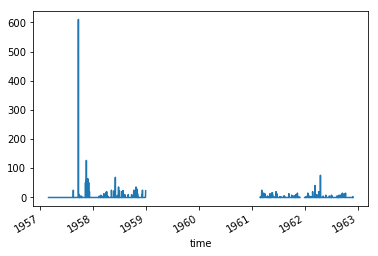

In [10]:
P['AYW00057401'].plot(); # Ellsworth

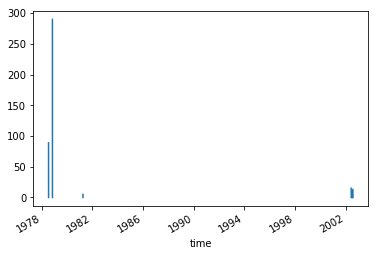

In [11]:
P['AYM00089022'].plot(); # Halley

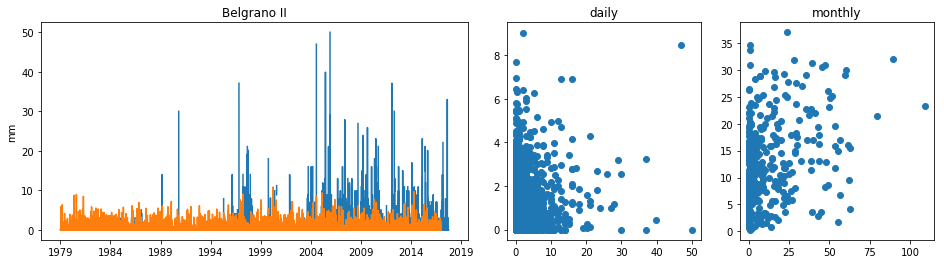

In [127]:
st = 'AYM00089034' # Belgrano II

i, j, _ = nearest(lon, lat, *r.loc[st, ['longitude', 'latitude']].values)
x = pptEra.isel(lon=j, lat=i).to_dataframe('x')['x']
y = pd.concat((P[st]/10, x*1000), 1)

plt.figure(figsize=(16, 4))

plt.subplot2grid((1, 4), (0, 0), 1, 2)
plt.plot(P[st]/10)
plt.plot(x.index, x*1000)
plt.title('Belgrano II')
plt.ylabel('mm')

plt.subplot2grid((1, 4), (0, 2), 1, 1)
plt.scatter(y[st], y['x'])
plt.title('daily')

plt.subplot2grid((1, 4), (0, 3), 1, 1)
ym = y.resample('MS').sum()
plt.scatter(ym[st], ym['x'])
plt.title('monthly');

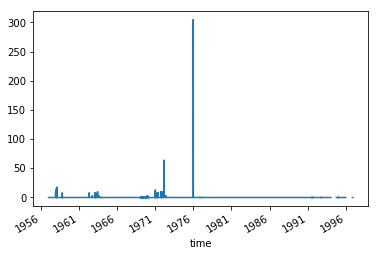

In [13]:
P['AYW00090001'].plot(); # Amundsen Scott

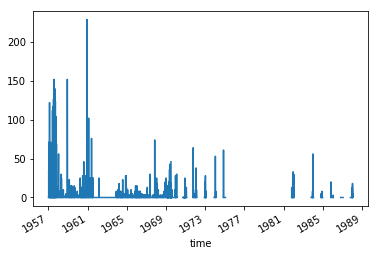

In [14]:
P['AYW00068201'].plot(); # Byrd

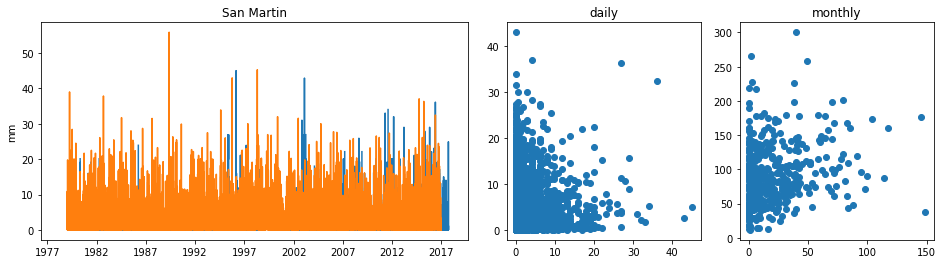

In [126]:
st = 'AYM00089066' # San Martin

i, j, _ = nearest(lon, lat, *r.loc[st, ['longitude', 'latitude']].values)
x = pptEra.isel(lon=j, lat=i).to_dataframe('x')['x']
y = pd.concat((P[st]/10, x*1000), 1)

plt.figure(figsize=(16, 4))

plt.subplot2grid((1, 4), (0, 0), 1, 2)
plt.plot(P[st]/10)
plt.plot(x.index, x*1000)
plt.title('San Martin')
plt.ylabel('mm')

plt.subplot2grid((1, 4), (0, 2), 1, 1)
plt.scatter(y[st], y['x'])
plt.title('daily')

plt.subplot2grid((1, 4), (0, 3), 1, 1)
ym = y.resample('MS').sum()
plt.scatter(ym[st], ym['x'])
plt.title('monthly');

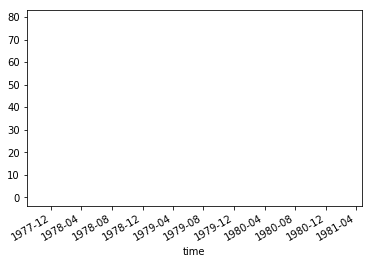

In [17]:
P['AYM00089062'].plot(); # Rothera

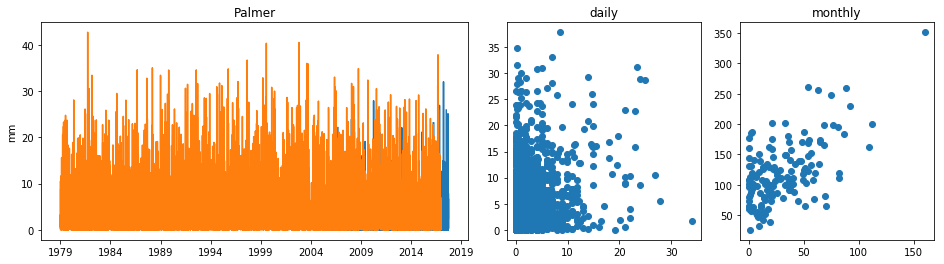

In [125]:
st = 'AYM00089061' # Palmer

i, j, _ = nearest(lon, lat, *r.loc[st, ['longitude', 'latitude']].values)
x = pptEra.isel(lon=j, lat=i).to_dataframe('x')['x']
y = pd.concat((P[st]/10, x*1000), 1)

plt.figure(figsize=(16, 4))

plt.subplot2grid((1, 4), (0, 0), 1, 2)
plt.plot(P[st]/10)
plt.plot(x.index, x*1000)
plt.title('Palmer')
plt.ylabel('mm')

plt.subplot2grid((1, 4), (0, 2), 1, 1)
plt.scatter(y[st], y['x'])
plt.title('daily')

plt.subplot2grid((1, 4), (0, 3), 1, 1)
ym = y.resample('MS').sum()
plt.scatter(ym[st], ym['x'])
plt.title('monthly');

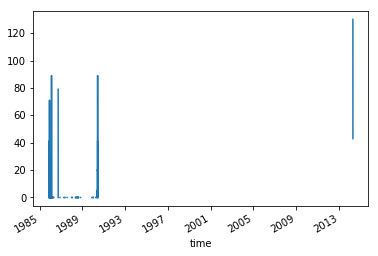

In [19]:
P['AYM00089063'].plot(); # Vernadsky

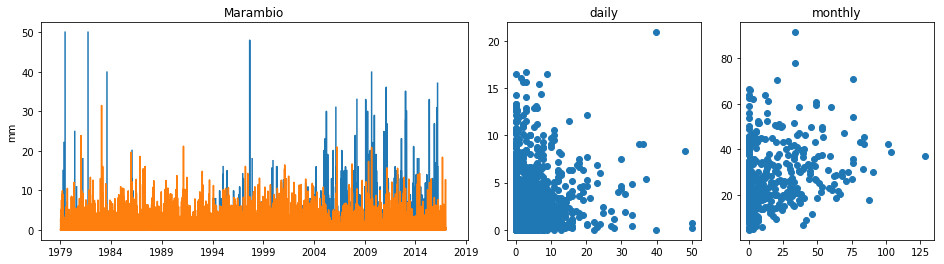

In [124]:
st = 'AYM00089055' # Marambio

i, j, _ = nearest(lon, lat, *r.loc[st, ['longitude', 'latitude']].values)
x = pptEra.isel(lon=j, lat=i).to_dataframe('x')['x']
y = pd.concat((P[st]/10, x*1000), 1)

plt.figure(figsize=(16, 4))

plt.subplot2grid((1, 4), (0, 0), 1, 2)
plt.plot(P[st]/10)
plt.plot(x.index, x*1000)
plt.title('Marambio')
plt.ylabel('mm')

plt.subplot2grid((1, 4), (0, 2), 1, 1)
plt.scatter(y[st], y['x'])
plt.title('daily')

plt.subplot2grid((1, 4), (0, 3), 1, 1)
ym = y.resample('MS').sum()
plt.scatter(ym[st], ym['x'])
plt.title('monthly');

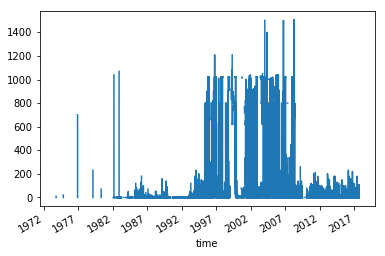

In [21]:
P['AYM00088963'].plot(); # Esperanza

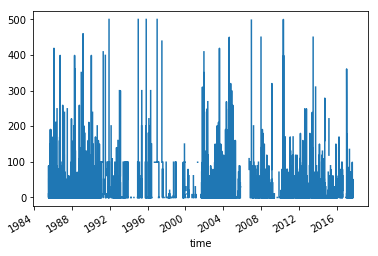

In [22]:
P['AYM00089059'].plot() # O'Higgins

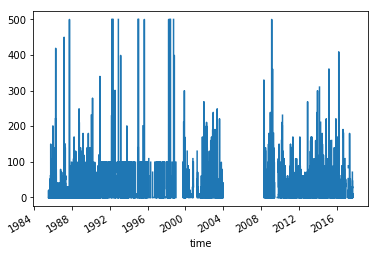

In [23]:
P['AYM00089057'].plot() # Prat

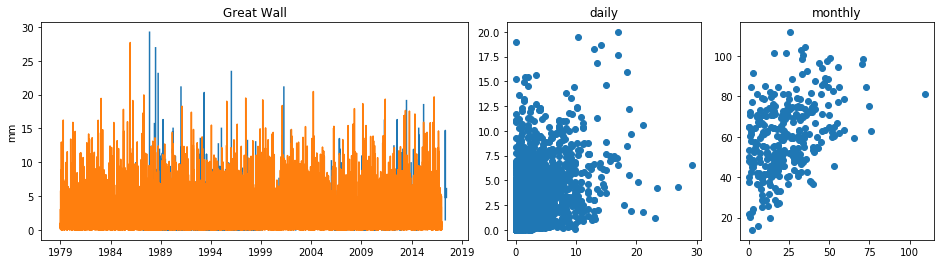

In [119]:
st = 'AYM00089058' # Great Wall

i, j, _ = nearest(lon, lat, *r.loc[st, ['longitude', 'latitude']].values)
x = pptEra.isel(lon=j, lat=i).to_dataframe('x')['x']
y = pd.concat((P[st]/10, x*1000), 1)

plt.figure(figsize=(16, 4))

plt.subplot2grid((1, 4), (0, 0), 1, 2)
plt.plot(P[st]/10)
plt.plot(x.index, x*1000)
plt.title('Great Wall')
plt.ylabel('mm')

plt.subplot2grid((1, 4), (0, 2), 1, 1)
plt.scatter(y[st], y['x'])
plt.title('daily')

plt.subplot2grid((1, 4), (0, 3), 1, 1)
ym = y.resample('MS').sum()
plt.scatter(ym[st], ym['x'])
plt.title('monthly');

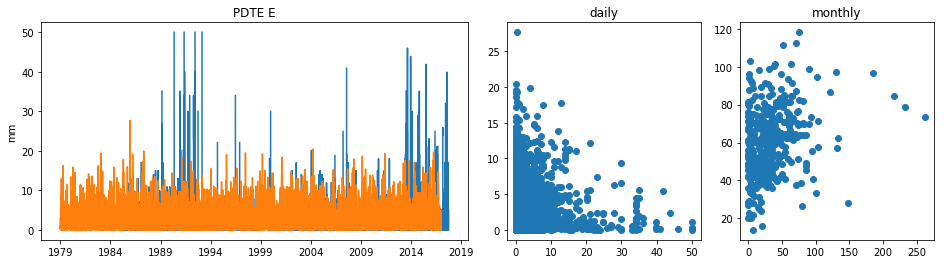

In [120]:
st = 'AYM00089056' # Centro Met Antarctica PDTE E ??

i, j, _ = nearest(lon, lat, *r.loc[st, ['longitude', 'latitude']].values)
x = pptEra.isel(lon=j, lat=i).to_dataframe('x')['x']
y = pd.concat((P[st]/10, x*1000), 1)

plt.figure(figsize=(16, 4))

plt.subplot2grid((1, 4), (0, 0), 1, 2)
plt.plot(P[st]/10)
plt.plot(x.index, x*1000)
plt.title('PDTE E')
plt.ylabel('mm')

plt.subplot2grid((1, 4), (0, 2), 1, 1)
plt.scatter(y[st], y['x'])
plt.title('daily')

plt.subplot2grid((1, 4), (0, 3), 1, 1)
ym = y.resample('MS').sum()
plt.scatter(ym[st], ym['x'])
plt.title('monthly');

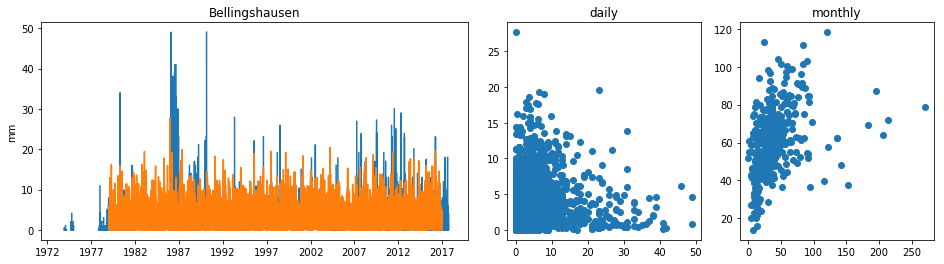

In [121]:
st = 'AYM00089050' # Bellingshausen

i, j, _ = nearest(lon, lat, *r.loc[st, ['longitude', 'latitude']].values)
x = pptEra.isel(lon=j, lat=i).to_dataframe('x')['x']
y = pd.concat((P[st]/10, x*1000), 1)

plt.figure(figsize=(16, 4))

plt.subplot2grid((1, 4), (0, 0), 1, 2)
plt.plot(P[st]/10)
plt.plot(x.index, x*1000)
plt.title('Bellingshausen')
plt.ylabel('mm')

plt.subplot2grid((1, 4), (0, 2), 1, 1)
plt.scatter(y[st], y['x'])
plt.title('daily')

plt.subplot2grid((1, 4), (0, 3), 1, 1)
ym = y.resample('MS').sum()
plt.scatter(ym[st], ym['x'])
plt.title('monthly');

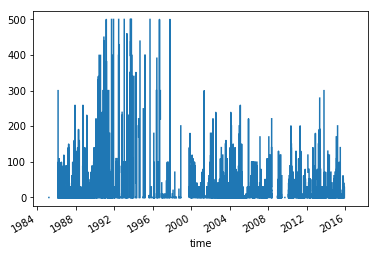

In [27]:
P['AYM00089054'].plot() # Dinamet Uruguay

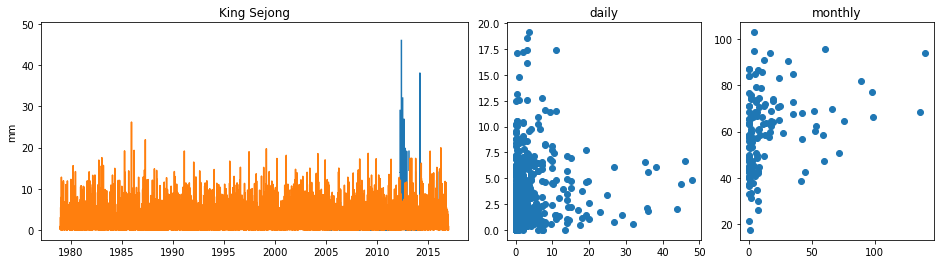

In [123]:
st = 'AYM00089251' # King Sejong

i, j, _ = nearest(lon, lat, *r.loc[st, ['longitude', 'latitude']].values)
x = pptEra.isel(lon=j, lat=i).to_dataframe('x')['x']
y = pd.concat((P[st]/10, x*1000), 1)

plt.figure(figsize=(16, 4))

plt.subplot2grid((1, 4), (0, 0), 1, 2)
plt.plot(P[st]/10)
plt.plot(x.index, x*1000)
plt.title('King Sejong')
plt.ylabel('mm')

plt.subplot2grid((1, 4), (0, 2), 1, 1)
plt.scatter(y[st], y['x'])
plt.title('daily')

plt.subplot2grid((1, 4), (0, 3), 1, 1)
ym = y.resample('MS').sum()
plt.scatter(ym[st], ym['x'])
plt.title('monthly');

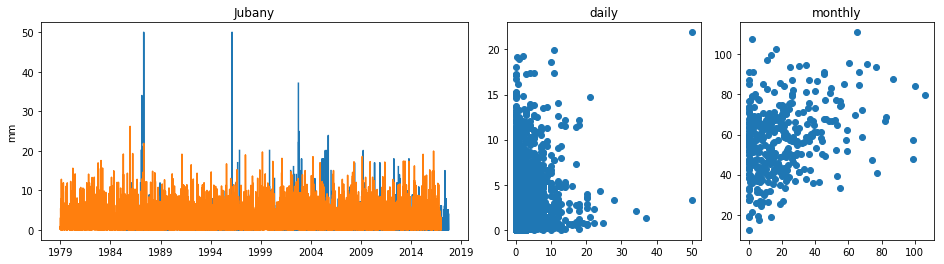

In [122]:
st = 'AYM00089053' # Jubany

i, j, _ = nearest(lon, lat, *r.loc[st, ['longitude', 'latitude']].values)
x = pptEra.isel(lon=j, lat=i).to_dataframe('x')['x']
y = pd.concat((P[st]/10, x*1000), 1)

plt.figure(figsize=(16, 4))

plt.subplot2grid((1, 4), (0, 0), 1, 2)
plt.plot(P[st]/10)
plt.plot(x.index, x*1000)
plt.title('Jubany')
plt.ylabel('mm')

plt.subplot2grid((1, 4), (0, 2), 1, 1)
plt.scatter(y[st], y['x'])
plt.title('daily')

plt.subplot2grid((1, 4), (0, 3), 1, 1)
ym = y.resample('MS').sum()
plt.scatter(ym[st], ym['x'])
plt.title('monthly');